In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [123]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<AxesSubplot:xlabel='date', ylabel='Inches'>

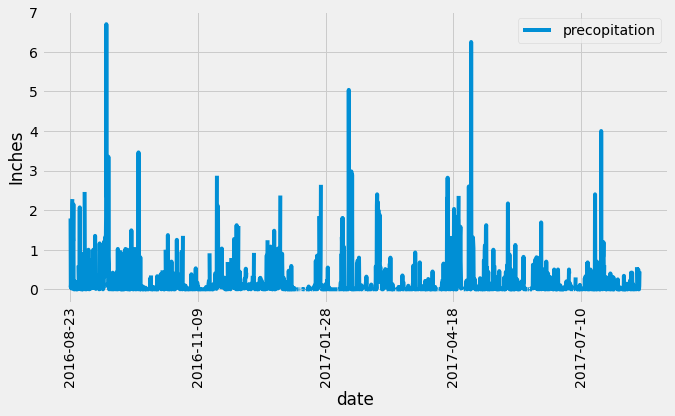

In [124]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.datetime(2017,8,23) - dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data,columns = ['date','precopitation'])
prcp_df = prcp_df.set_index('date')
# Sort the dataframe by date
prcp_df = prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(ylabel = 'Inches', figsize = (10,5), rot = 90)

In [125]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precopitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [105]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [109]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [137]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, '')

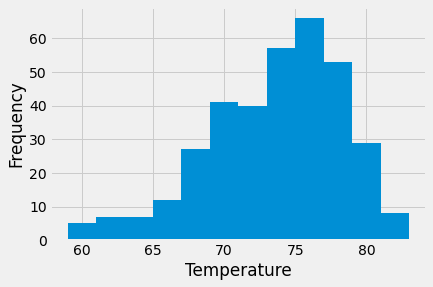

In [132]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= start_date, Measurement.station =='USC00519281').all()
temp_df = pd.DataFrame(data,columns = ['date','temperature'])
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index()
temp_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("")

# Close session

In [16]:
# Close Session
session.close()